# **Assignment 3**

**Submitted by : Ritu Gahir**

**Team Members :**

1.   Ritu Gahir - Group 3

2.   Libin Kutty - Group 2

1.   Viju Sudhi - Group 10


---











In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

In [0]:
tf.__version__

'2.2.0'

In [0]:
os.getcwd()

'/content'

# **CNN on MNIST**

---


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape

(60000, 28, 28)

In [0]:
data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1,28,28,1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = data.shuffle(buffer_size=60000).batch(128).repeat(3)

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1,28,28,1]).astype(np.float32)/ 255, test_labels.astype(np.int32))).batch(128)

#.reshape([-1,28,28,1]).astype(np.float32)


In [0]:
#Model 
n_h = 256
model=tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(28 , (3,3) , activation='relu',input_shape=(28,28,1)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(28 , (3,3) , activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(28 , (3,3) , activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(n_h , activation=tf.nn.relu),
     tf.keras.layers.Dense(n_h//2, activation=tf.nn.relu),
     tf.keras.layers.Dense(10)
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 28)          7084      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 28)          0         
_________________________________________________________________
flatten (Flatten)            (None, 28)               

In [0]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
test_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [0]:
epochs = 3
for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))

  for step, (x_batch_train, y_batch_train) in enumerate(train_data):

    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training=True)
      loss_value = loss_fn(y_batch_train, logits)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    train_acc_metric(y_batch_train, logits)

    # Log every 200 batches.
    if step % 500 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

  train_acc = train_acc_metric.result()
  print('Training acc over epoch: %s' % (float(train_acc),))

Start of epoch 0
Training loss (for one batch) at step 0: 2.3004422187805176
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.1309630423784256
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.10333317518234253
Seen so far: 64064 samples
Training acc over epoch: 0.9360777735710144
Start of epoch 1
Training loss (for one batch) at step 0: 0.0715174749493599
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.07514865696430206
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.036931272596120834
Seen so far: 64064 samples
Training acc over epoch: 0.957925021648407
Start of epoch 2
Training loss (for one batch) at step 0: 0.08261911571025848
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.024450715631246567
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.023984048515558243
Seen so far: 64064 samples
Training acc over epoch: 0.9673018455505371


In [0]:
for x_batch_test, y_batch_test in test_data:
  test_logits = model(x_batch_test)
    # Update val metrics
  test_acc_metric(y_batch_test, test_logits)
test_acc = test_acc_metric.result()
test_acc_metric.reset_states()
print('Test acc: %s' % (float(test_acc),))

Test acc: 0.9836000204086304


**Observations** :

---




*   With only one convolution layer followed by max pooling , SGd as optimiser :
    Training accuracy : 90.90      Test Accuracy : 92.28

*   With only one convolution layer followed by max pooling , SGd as optimiser :
    Training accuracy : 90.90      Test Accuracy : 92.28

*   With only one convolution layer followed by max pooling and Adam Optimiser :
    Training Accuracy : 98.76      Test Accuracy : 98.65


*   With 3 convolution and maxpooling layers and Adam optimiser :
    Training Accuracy : 96.73      Test Accuracy : 98.36












# **CNN on Fashion MNIST**

---



In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images_fashion_mnist, train_labels_fashion_mnist), (test_images_fashion_mnist, test_labels_fashion_mnist) = fashion_mnist.load_data()

train_images_fashion_mnist.shape

(60000, 28, 28)

In [0]:
data_fashion_mnist = tf.data.Dataset.from_tensor_slices(
    (train_images_fashion_mnist.reshape([-1,28,28,1]).astype(np.float32) / 255, train_labels_fashion_mnist.astype(np.int32)))
train_data_fashion_mnist = data_fashion_mnist.shuffle(buffer_size=60000).batch(128).repeat(3)

# note: we batch the test data, but do not shuffle/repeat
test_data_fashion_mnist = tf.data.Dataset.from_tensor_slices(
    (test_images_fashion_mnist.reshape([-1,28,28,1]).astype(np.float32)/ 255, test_labels_fashion_mnist.astype(np.int32))).batch(128)

#.reshape([-1,28,28,1]).astype(np.float32)

In [0]:
#Model 
n_h = 256
model_fashion_mnist=tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(28 , (3,3) , activation='relu',input_shape=(28,28,1)),
     tf.keras.layers.MaxPooling2D(2,2),
     #tf.keras.layers.Conv2D(56 , (3,3) , activation='relu'),
     #tf.keras.layers.MaxPooling2D(2,2),
     #tf.keras.layers.Conv2D(112 , (3,3) , activation='relu'),
     #tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(n_h , activation=tf.nn.relu),
     tf.keras.layers.Dense(n_h//2, activation=tf.nn.relu),
     tf.keras.layers.Dense(10)
    ])
model_fashion_mnist.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 4732)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               1211648   
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1290      
Total params: 1,246,114
Trainable params: 1,246,114
Non-trainable params: 0
___________________________________________

In [0]:
optimizer_fashion_mnist = keras.optimizers.SGD(learning_rate=1e-3)
loss_fn_fashion_mnist = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric_fashion_mnist = keras.metrics.SparseCategoricalAccuracy()
test_acc_metric_fashion_mnist = keras.metrics.SparseCategoricalAccuracy()

In [0]:
epochs = 3
for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))

  for step, (x_batch_train, y_batch_train) in enumerate(train_data_fashion_mnist):

    with tf.GradientTape() as tape:
      logits = model_fashion_mnist(x_batch_train, training=True)
      loss_value = loss_fn_fashion_mnist(y_batch_train, logits)

    grads = tape.gradient(loss_value, model_fashion_mnist.trainable_weights)
    optimizer_fashion_mnist.apply_gradients(zip(grads, model_fashion_mnist.trainable_weights))

    train_acc_metric_fashion_mnist(y_batch_train, logits)

    # Log every 500 batches.
    if step % 500 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

  train_acc_fashion_mnist = train_acc_metric_fashion_mnist.result()
  print('Training acc over epoch: %s' % (float(train_acc_fashion_mnist),))

Start of epoch 0
Training loss (for one batch) at step 0: 0.05330808833241463
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.14208944141864777
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.07391132414340973
Seen so far: 64064 samples
Training acc over epoch: 0.9417096972465515
Start of epoch 1
Training loss (for one batch) at step 0: 0.04321150854229927
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.021154409274458885
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.06504204124212265
Seen so far: 64064 samples
Training acc over epoch: 0.9498777985572815
Start of epoch 2
Training loss (for one batch) at step 0: 0.09974157065153122
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.06283340603113174
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.015153417363762856
Seen so far: 64064 samples
Training acc over epoch: 0.9553916454315186


In [0]:
for x_batch_test, y_batch_test in test_data_fashion_mnist:
  test_logits = model_fashion_mnist(x_batch_test)
    # Update val metrics
  test_acc_metric_fashion_mnist(y_batch_test, test_logits)
test_acc_fashion_mnist = test_acc_metric_fashion_mnist.result()
#test_acc_metric.reset_states()
print('Test acc: %s' % (float(test_acc_fashion_mnist),))

Test acc: 0.9226999878883362


**Observations** :

---





*   With only one convolution layer followed by max pooling , SGd as optimiser :
Training accuracy : 95.5  Test Accuracy : 92.26


*   With only one convolution layer followed by max pooling and Adam Optimiser :
Training Accuracy : 92.85  Test Accuracy : 92

*   With 3 convolution and maxpooling layers and Adam optimiser :
TRaining ACcuracy : 86.93  Test Accuracy : 89.12













# **CNN on CIFAR10**

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
cifar_10 = tf.keras.datasets.cifar10
(train_images_cifar, train_labels_cifar), (test_images_cifar, test_labels_cifar) = cifar_10.load_data()

train_labels_cifar=train_labels_cifar.reshape((-1,))
test_labels_cifar =test_labels_cifar.reshape((-1,))


170500096/170498071 [==============================] - 2s 0us/step


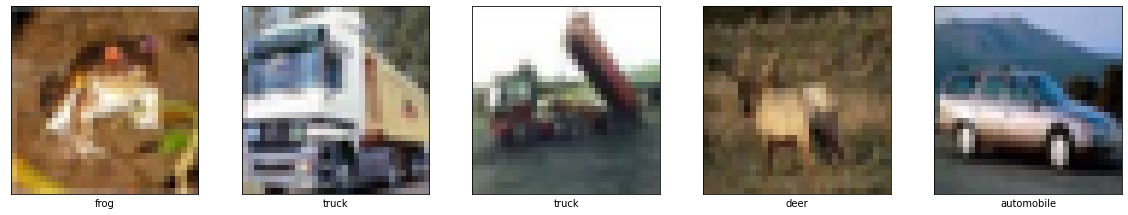

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_cifar[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels_cifar[i]])
plt.show()

In [4]:
data_cifar = tf.data.Dataset.from_tensor_slices(
    (train_images_cifar.reshape([-1,32,32,3]).astype(np.float32) / 255, train_labels_cifar.astype(np.int32)))
train_data_cifar = data_cifar.shuffle(buffer_size=60000).batch(128).repeat(3)

# note: we batch the test data, but do not shuffle/repeat
test_data_cifar = tf.data.Dataset.from_tensor_slices(
    (test_images_cifar.reshape([-1,32,32,3]).astype(np.float32)/ 255, test_labels_cifar.astype(np.int32))).batch(128)

#.reshape([-1,28,28,1]).astype(np.float32)

print (train_data_cifar)

<RepeatDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int32)>


In [17]:
#Model 
n_h = 256
model_cifar=tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32 , (3,3) , activation='relu',kernel_initializer='he_uniform', padding='same',input_shape=(32,32,3)), #kernel_regularizer=l2(0.001)
     tf.keras.layers.Conv2D(32 , (3,3) , activation='relu',kernel_initializer='he_uniform',padding='same'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.2),

     tf.keras.layers.Conv2D(64 , (3,3) , activation='relu',kernel_initializer='he_uniform',padding='same'),#,kernel_regularizer=l2(0.001) ),
     tf.keras.layers.Conv2D(64 , (3,3) , activation='relu',kernel_initializer='he_uniform',padding='same'),#,kernel_regularizer=l2(0.001)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.2),

     tf.keras.layers.Conv2D(128 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'),#kernel_regularizer=l2(0.001)),
     tf.keras.layers.Conv2D(128 , (3,3) , activation='relu',kernel_initializer='he_uniform',padding='same'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.2),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128 , activation=tf.nn.relu,kernel_initializer='he_uniform'),#,kernel_regularizer=l2(0.001)),#kernel_regularizer=l2(0.001) Regularisation
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(n_h//2 , activation=tf.nn.relu),
    
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
model_cifar.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
optimizer_cifar = keras.optimizers.SGD(lr=0.001, momentum=0.9)
loss_fn_cifar = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric_cifar = keras.metrics.SparseCategoricalAccuracy()
test_acc_metric_cifar = keras.metrics.SparseCategoricalAccuracy()

In [22]:
epochs = 100
for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))

  for step, (x_batch_train_cifar, y_batch_train_cifar) in enumerate(train_data_cifar):

    with tf.GradientTape() as tape:
      logits = model_cifar(x_batch_train_cifar, training=True)
      loss_value = loss_fn_cifar(y_batch_train_cifar, logits)

    grads = tape.gradient(loss_value, model_cifar.trainable_weights)
    optimizer_cifar.apply_gradients(zip(grads, model_cifar.trainable_weights))

    train_acc_metric_cifar(y_batch_train_cifar, logits)

    # Log every 200 batches.
    if step % 500 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

  train_acc_cifar = train_acc_metric_cifar.result()
  print('Training acc over epoch: %s' % (float(train_acc_cifar),))

Start of epoch 0
Training loss (for one batch) at step 0: 1.7130677700042725
Seen so far: 64 samples
Training loss (for one batch) at step 500: 1.7450262308120728
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 1.7394282817840576
Seen so far: 64064 samples
Training acc over epoch: 0.5904320478439331
Start of epoch 1
Training loss (for one batch) at step 0: 1.7611570358276367
Seen so far: 64 samples
Training loss (for one batch) at step 500: 1.7287757396697998
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 1.7214266061782837
Seen so far: 64064 samples
Training acc over epoch: 0.593298077583313
Start of epoch 2
Training loss (for one batch) at step 0: 1.7170360088348389
Seen so far: 64 samples
Training loss (for one batch) at step 500: 1.7393851280212402
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 1.662774682044983
Seen so far: 64064 samples
Training acc over epoch: 0.5961527228355408
Start of epoch 3
Training loss

In [23]:
for x_batch_test_cifar, y_batch_test_cifar in test_data_cifar:
  test_logits = model_cifar(x_batch_test_cifar)
    # Update val metrics
  test_acc_metric_cifar(y_batch_test_cifar, test_logits)
test_acc_cifar = test_acc_metric_cifar.result()
#test_acc_metric_cifar.reset_states()
print('Test acc: %s' % (float(test_acc_cifar),))

Test acc: 0.7749999761581421


**Observations :**

---



*   With only one convolution layer followed by max pooling , SGd as optimiser :
Training accuracy : 67.05  Test Accuracy : 66.51

*   With only one convolution layer followed by max pooling and Adam Optimiser :
Training Accuracy : 90.03  Test Accuracy : 64.59  --> Overfitting 

*   With 3 convolution and maxpooling layers and Adam optimiser :
TRaining ACcuracy : 52.43  Test Accuracy : 58.31














In [0]:
#Filters and their shape

for layer in model_cifar.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)
conv2d_4 (3, 3, 64, 128)
conv2d_5 (3, 3, 128, 128)


In [0]:
#convolution layers and their sizes

from matplotlib import pyplot

# summarize feature map shapes
for i in range(len(model_cifar.layers)):
	layer = model_cifar.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d (None, 32, 32, 32)
1 conv2d_1 (None, 32, 32, 32)
3 conv2d_2 (None, 14, 14, 64)
4 conv2d_3 (None, 14, 14, 64)
6 conv2d_4 (None, 5, 5, 128)
7 conv2d_5 (None, 5, 5, 128)


In [0]:
print(model_cifar.inputs)
print(model_cifar.layers[0].output)

[<tf.Tensor 'conv2d_input:0' shape=(None, 32, 32, 3) dtype=float32>]
Tensor("conv2d/Identity:0", shape=(None, 32, 32, 32), dtype=float32)


In [0]:
from keras.models import Model
model_conv_cifar = tf.keras.models.Model(inputs=model_cifar.inputs, outputs=model_cifar.layers[0].output)

Using TensorFlow backend.


In [0]:
#taking first image

for x,y in train_data_cifar:
  print(x[:1,:,:,:].shape)
  train_img=x
  train=x[:1,:,:,:]
  break
#train.reshape(-1,32,32,3)

(1, 32, 32, 3)


In [0]:
feature_map=model_conv_cifar.predict(train)

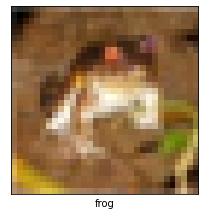

In [0]:
#FIRST IMAGE FED INTO cnn

plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images_cifar[0], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.xlabel(class_names[train_labels_cifar[0]])
plt.show()

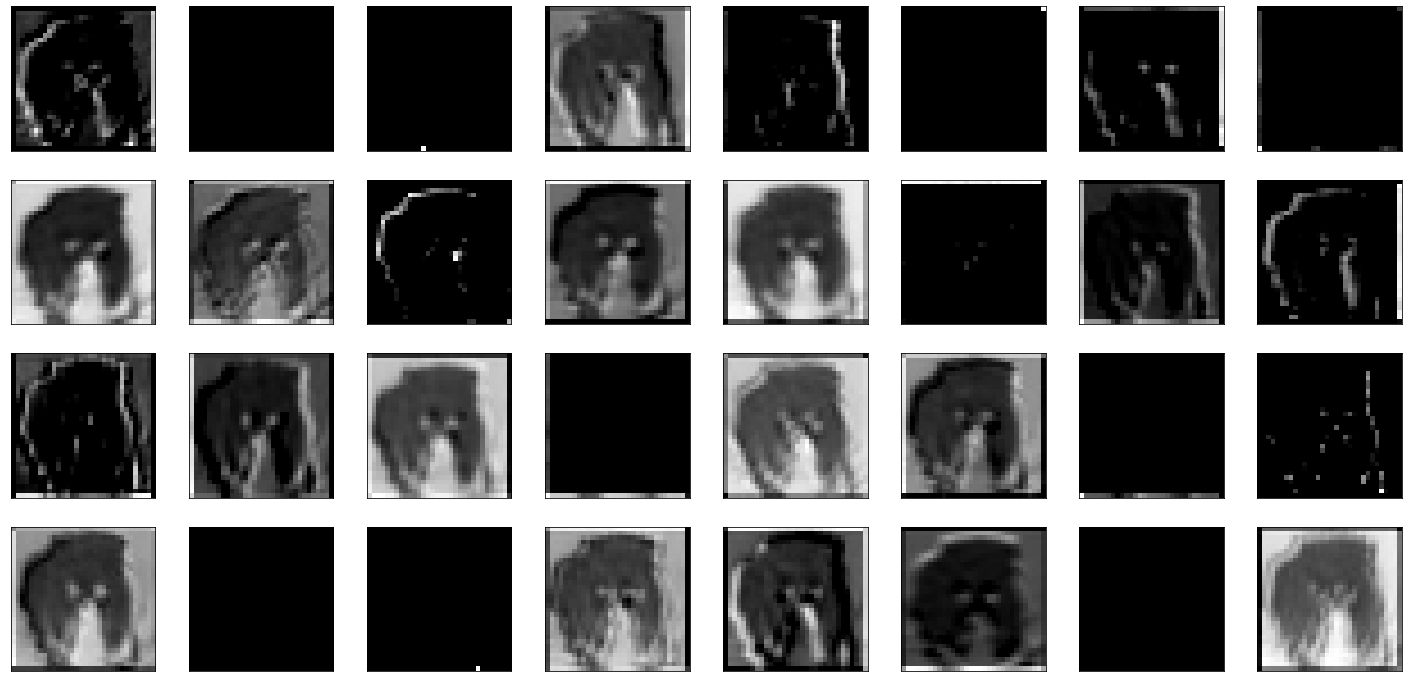

In [0]:
#Feature maps of first input image by first convolution layer

1square = 8
plt.figure(figsize=(25,25))
ix = 1
for _ in range(32):
		# specify subplot and turn of axis
		plt.subplot(square, square, ix)
		plt.xticks([])
		plt.yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

**Experiments**

*   Filter size 1X1 train accuracy 54 and test accuracy 57

*   With increased units for each conv layer and filter 3X3 : training 57.57 test: 67

*   With 2 conv layer and only 1 dense layer : train :60 test 66

*   After increasing the convolution layers the accuracy achieved was still between 50 and 60%

*   On increasing the number of epochs the accuracy achieved was around 67% with training accuracy of 7%

*   baseline + weight regiulariser (50 epochs)--> Training: 71.1  Testing : 70.9

*   baseline + weight regiulariser (100 epochs)--> Training: 85%  Testing :  71.4%

*   Baseline + dropout (50 epochs)--> Training: 58.7 Testing : 73.86

*   Baseline + dropout (100 epochs)--> Training: 74.38  Testing : 77.49







